In [12]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Sci-Kit Learn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

In [13]:
pcaData = pd.read_csv('./Data/PCAData.csv')
pcaData.drop(['Player','Team'],axis=1,inplace=True)
pcaData.describe().round(1)

,PC1,PC2,PC3,PC4,PC5
count,397.0,397.0,397.0,397.0,397.0
mean,-0.0,0.0,-0.0,-0.0,0.0
std,5.4,4.7,2.8,2.5,2.1
min,-10.4,-8.2,-7.1,-6.3,-5.7
25%,-4.1,-3.3,-1.9,-1.6,-1.5
50%,-1.2,-1.0,-0.2,-0.0,-0.0
75%,3.3,2.3,1.9,1.6,1.3
max,16.9,16.5,8.1,8.9,9.6


In [14]:
# to standardise the principle components
scaler = StandardScaler()
pcaDataScaled = scaler.fit_transform(pcaData)


In [15]:
# # check if components are standardised
# pcaDataScaled = pd.DataFrame(pcaDataScaled, columns = ['PC1','PC2','PC3','PC4','PC5'])
# pcaDataScaled.describe().round(1)

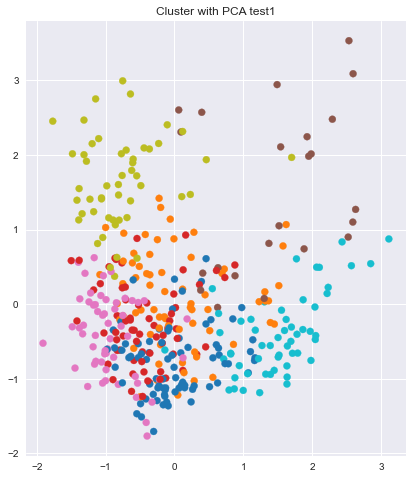

In [16]:
#Predict K-Means cluster membership
km_neat = KMeans(n_clusters=7, random_state=2).fit_predict(pcaDataScaled)
#km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='Cluster with PCA test1')

plt.scatter(pcaDataScaled[:,0], pcaDataScaled[:,1], c=km_neat, cmap=cmap)